<a href="https://colab.research.google.com/github/nuwanc/ml/blob/main/adp_cw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#following python libaries need to be installed in the notebook.
#!pip install pandas
#!pip install numpy
#!pip install matplotlib

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Introduction
This notebook analyzes the SUPPORT2 dataset, which contains information about critically ill patients. The goal is to explore trends, assess correlations, and provide insights into patient outcomes, comorbidities, and hospital resource utilization.


In [6]:
#load the suppport2.csv file to using pands to a variable called df
df = pd.read_csv('support2.csv')

In [7]:
# Dataset Overview
print("Dataset Shape:", df.shape)
print(df.info())
print("Missing Values:\n", df.isnull().sum())


Dataset Shape: (9105, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv

### Dataset Overview
The dataset contains 9,105 rows and 48 columns. Key variables include age, gender, comorbidities, and outcomes like mortality and length of stay. Missing values are noted in specific columns, requiring imputation. extensive desriptions of the column values and dataset can be refered in the following web link [link text](https://archive.ics.uci.edu/dataset/880/support2)





###Size and general information on the dataset

In [8]:
# Get size of dataset
rows, columns = df.shape
print(f"The dataset has {rows} rows and {columns} columns.")

# Count columns based on their data types
int_float_count = df.select_dtypes(include=['int64', 'float64']).shape[1]
object_count = df.select_dtypes(include=['object']).shape[1]

print(f"The dataset has {int_float_count} columns with dtype int64 and float64 and {object_count} columns with dtype object.")

The dataset has 9105 rows and 48 columns.
The dataset has 40 columns with dtype int64 and float64 and 8 columns with dtype object.


### Column type information

In [9]:
# Extract column names based on their data types
int_float_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()

print('dtype int64 and float64 column names:')
for column in int_float_columns:
    print(column)
print('------------------------------------------------')
print('dtype object column names:')
for column in object_columns:
    print(column)

dtype int64 and float64 column names:
ID
age
death
hospdead
slos
d.time
num.co
edu
scoma
charges
totcst
totmcst
avtisst
sps
aps
surv2m
surv6m
hday
diabetes
dementia
prg2m
prg6m
dnrday
meanbp
wblc
hrt
resp
temp
pafi
alb
bili
crea
sod
ph
glucose
bun
urine
adlp
adls
adlsc
------------------------------------------------
dtype object column names:
sex
dzgroup
dzclass
income
race
ca
dnr
sfdm2


### Missing value summary in the dataset

In [10]:
# Identifying columns with missing values and their percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Creating a summary table for columns with missing values
missing_summary = pd.DataFrame({
    "Column": df.columns,
    "Missing Values": missing_values,
    "Missing Percentage": missing_percentage
}).sort_values(by="Missing Percentage", ascending=False)

# Filtering only columns with missing values
missing_summary_filtered = missing_summary[missing_summary["Missing Values"] > 0].copy()

# Adding datatype information explicitly
missing_summary_filtered['Data Type'] = missing_summary_filtered['Column'].apply(lambda x: df[x].dtype)

# Using pandas Styler to pretty print the missing values summary
styled_missing_summary = missing_summary_filtered.style.format({
    "Missing Values": "{:.0f}",
    "Missing Percentage": "{:.2f}%"
}).background_gradient(subset=["Missing Percentage"], cmap="Reds").set_caption("Missing Values Summary")

styled_missing_summary

,Column,Missing Values,Missing Percentage,Data Type
adlp,adlp,5641,61.95%,float64
urine,urine,4862,53.40%,float64
glucose,glucose,4500,49.42%,float64
bun,bun,4352,47.80%,float64
totmcst,totmcst,3475,38.17%,float64
alb,alb,3372,37.03%,float64
income,income,2982,32.75%,object
adls,adls,2867,31.49%,float64
bili,bili,2601,28.57%,float64
pafi,pafi,2325,25.54%,float64


### Descriptive/Summary statistics (mean, median, standard deviation, etc.)

In [12]:
df.describe()

,ID,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,...,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,4553.000000,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,11.747691,12.058546,5.999579e+04,...,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,2628.531434,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,3.447743,24.636694,1.026488e+05,...,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,1.000000,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,...,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2277.000000,52.797000,0.000000,0.000000,6.000000,26.000000,1.000000,10.000000,0.000000,9.740000e+03,...,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,4553.000000,64.856990,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.502400e+04,...,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,6829.000000,73.998960,1.000000,1.000000,20.000000,761.000000,3.000000,14.000000,9.000000,6.459800e+04,...,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,9105.000000,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,...,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


### Duplicate row in the dataset

In [13]:
# Checking for Duplicates
duplicates = df.duplicated().sum()
print(f"Number of Duplicates: {duplicates}")

Number of Duplicates: 0


### Missing value handling

missing values were imputed based on the recommendation done in the following web link. [link text](https://hbiostat.org/data/repo/supportdesc)

In [14]:
# Impute the 'alb' column with the value 3.5 where it is missing
df['alb'] = df['alb'].fillna(3.5)
# Impute the 'pafi' column with the value 333.3 where it is missing
df['pafi'] = df['pafi'].fillna(333.3)
# Impute the 'bili' column with the value 1.01 where it is missing
df['bili'] = df['bili'].fillna(1.01)
# Impute the 'crea' column with the value 1.01 where it is missing
df['crea'] = df['crea'].fillna(1.01)
# Impute the 'bun' column with the value 6.51 where it is missing
df['bun'] = df['bun'].fillna(6.51)
# Impute the 'wblc' column with the value 9000 where it is missing
df['wblc'] = df['wblc'].fillna(9000)
# Impute the 'urine' column with the value 2502 where it is missing
df['urine'] = df['urine'].fillna(2502)

### Outliers
Outliers were detected in several columns, we have analyed. due to the importance of the column and based on the description of the dataset, no columns were removed from the dataset during EDA.

In [17]:
# Detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Find outliers in the 'age' column
age_outliers = detect_outliers_iqr(df, 'age')
print(f"Number of outliers in 'age': {len(age_outliers)}")

# Find outliers in the 'charges' column
charges_outliers = detect_outliers_iqr(df, 'charges')
print(f"Number of outliers in 'charges': {len(charges_outliers)}")

# Find outliers in the 'hday' column
hday_outliers = detect_outliers_iqr(df, 'hday')
print(f"Number of outliers in 'hday': {len(hday_outliers)}")

Number of outliers in 'age': 56
Number of outliers in 'charges': 912
Number of outliers in 'hday': 1543


### Basic plots



#### 1. Age distribution

Age Range: 18.04199 to 101.84796
Median Age: 64.85699


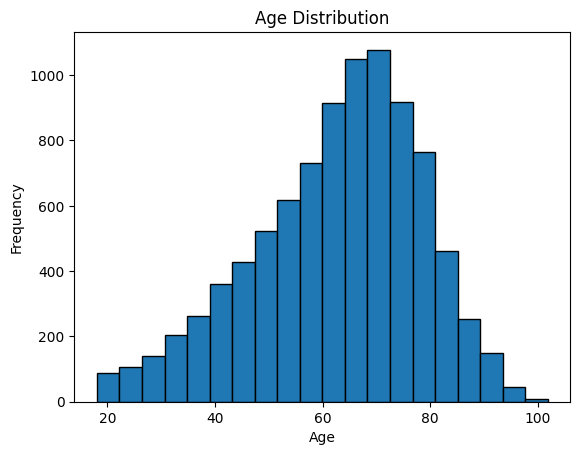

In [18]:
# Descriptive Statistics for Age
age_min = df['age'].min()
age_max = df['age'].max()
age_median = df['age'].median()

# Print results
print(f"Age Range: {age_min} to {age_max}")
print(f"Median Age: {age_median}")

# Optional: Histogram or Boxplot for Visualization
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

####2.Gender Representation

Gender Distribution:
sex
male      56.287754
female    43.712246
Name: proportion, dtype: float64


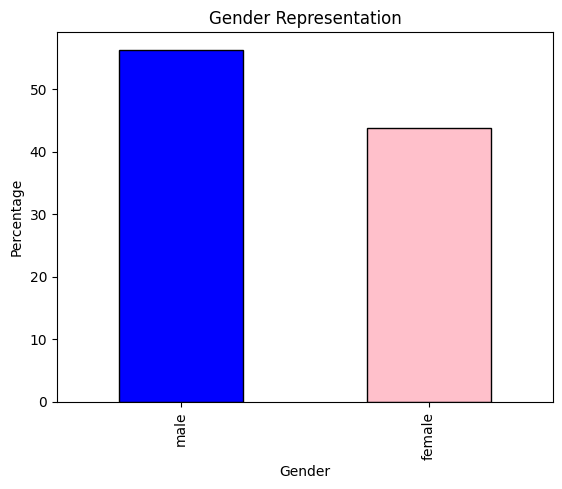

In [19]:
# Calculate gender distribution
gender_distribution = df['sex'].value_counts(normalize=True) * 100

# Print results
print("Gender Distribution:")
print(gender_distribution)

# Visualization
gender_distribution.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')
plt.title('Gender Representation')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

#### 3.Primary Diagnoses

Top 3 Primary Diagnoses (%):
dzgroup
ARF/MOSF w/Sepsis    38.605162
CHF                  15.233388
COPD                 10.620538
Name: proportion, dtype: float64


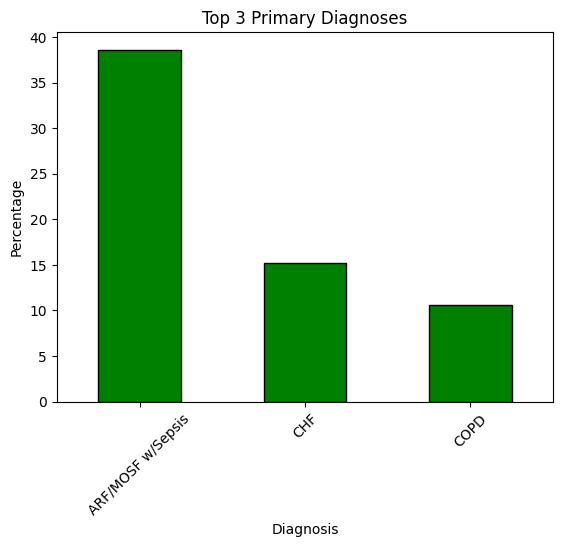

In [33]:
# Frequency counts for primary diagnoses
diagnosis_counts = df['dzgroup'].value_counts(normalize=True) * 100

# Filter the most common conditions (Top 3)
top_diagnoses = diagnosis_counts.head(3)

# Print results
print("Top 3 Primary Diagnoses (%):")
print(top_diagnoses)

# Visualization of top diagnoses
top_diagnoses.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 3 Primary Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


#### 4. Mortality Rates

Mortality Rate: 25.92%


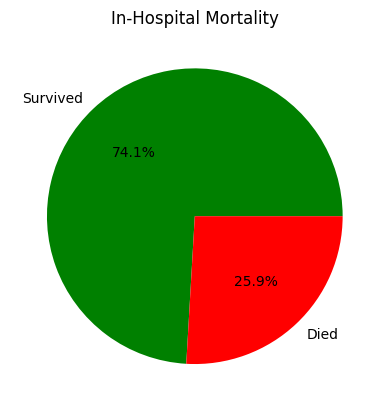

In [34]:
# Mortality Rate Calculation
mortality_rate = df['hospdead'].mean() * 100

# Print the result
print(f"Mortality Rate: {mortality_rate:.2f}%")

survival_counts = df['hospdead'].value_counts()
survival_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Survived', 'Died'], colors=['green', 'red'])
plt.title('In-Hospital Mortality')
plt.ylabel('')  # Remove the default y-label
plt.show()

#### 5. Comorbidities

Percentage of Patients with Two or More Comorbidities: 54.06%


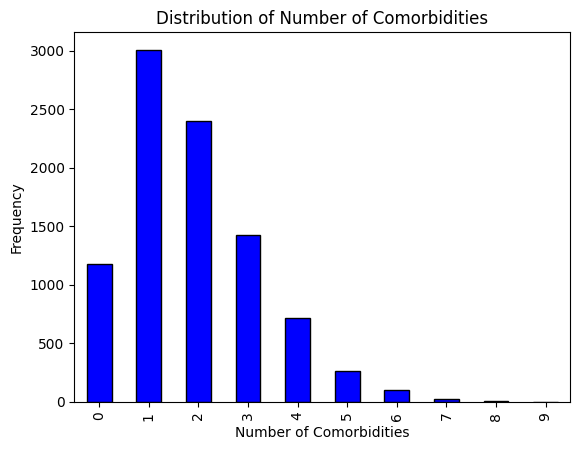

In [35]:
# Calculate the proportion of patients with two or more comorbid conditions
two_or_more_comorbidities = (df['num.co'] >= 2).mean() * 100

# Print the result
print(f"Percentage of Patients with Two or More Comorbidities: {two_or_more_comorbidities:.2f}%")

# Plot the distribution of comorbidities
df['num.co'].value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Distribution of Number of Comorbidities')
plt.xlabel('Number of Comorbidities')
plt.ylabel('Frequency')
plt.show()

#### 6. Functional Status

Percentage of Patients Requiring Assistance with Daily Activities: 65.86%
adlsc
True     65.864909
False    34.135091
Name: proportion, dtype: float64


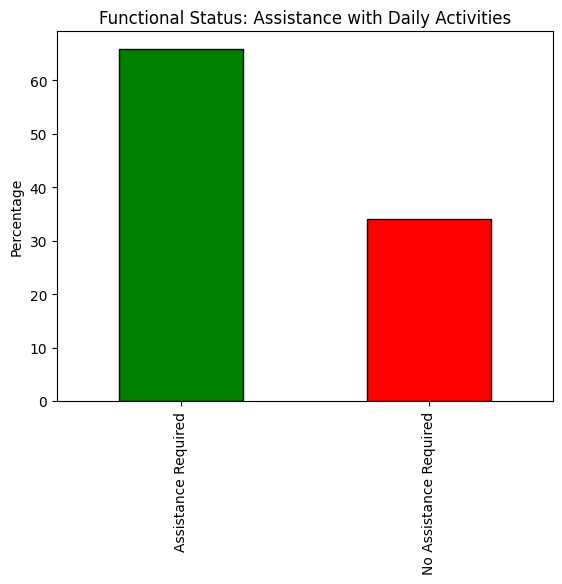

In [36]:
# Calculate the proportion of patients requiring assistance with daily activities
functional_impairment = (df['adlsc'] > 0).mean() * 100
# Print the result
print(f"Percentage of Patients Requiring Assistance with Daily Activities: {functional_impairment:.2f}%")
# Visualization
functional_status_counts = (df['adlsc'] > 0).value_counts(normalize=True) * 100
print(functional_status_counts)
functional_status_counts.index = ['Assistance Required', 'No Assistance Required']

functional_status_counts.plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title('Functional Status: Assistance with Daily Activities')
plt.ylabel('Percentage')
plt.show()


#### 7. Cancer patients

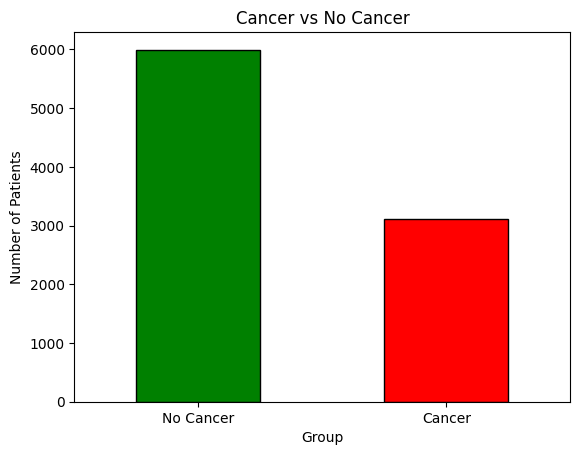

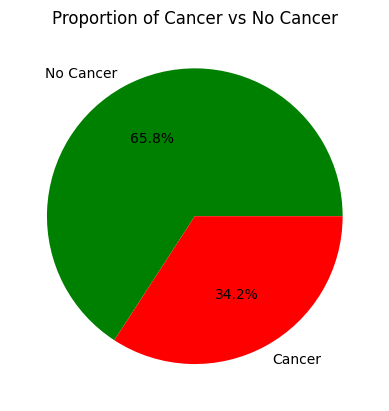

In [39]:
# Combine 'yes' and 'metastatic' into a single 'Cancer' group
df['cancer_group'] = df['ca'].apply(lambda x: 'Cancer' if x in ['yes', 'metastatic'] else 'No Cancer')

# Count the new groups
cancer_group_counts = df['cancer_group'].value_counts()

# Plot as a bar chart
cancer_group_counts.plot(kind='bar', color=['green', 'red'], edgecolor='black')

# Add labels and title
plt.title('Cancer vs No Cancer')
plt.xlabel('Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

# Alternatively, plot as a pie chart
cancer_group_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], labels=['No Cancer', 'Cancer'])

# Add title
plt.title('Proportion of Cancer vs No Cancer')
plt.ylabel('')  # Remove the default y-axis label
plt.show()

#### 8. Respiratory Support
[pafi values description](https://litfl.com/pao2-fio2-ratio/)

Percentage of Patients Receiving Mechanical Ventilation: 30.70%


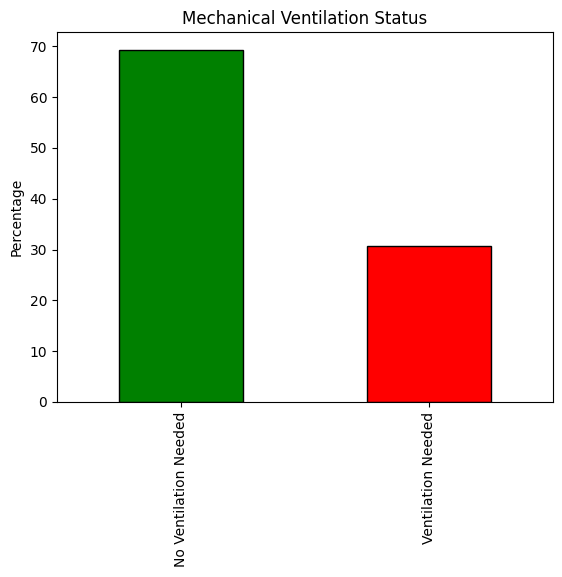

In [40]:
# Calculate the proportion of patients with pafi < 200
mechanical_ventilation_percentage = (df['pafi'] < 200).mean() * 100

# Print the result
print(f"Percentage of Patients Receiving Mechanical Ventilation: {mechanical_ventilation_percentage:.2f}%")

# Visualization
ventilation_counts = (df['pafi'] < 200).value_counts(normalize=True) * 100
ventilation_counts.index = ['No Ventilation Needed', 'Ventilation Needed']

ventilation_counts.plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title('Mechanical Ventilation Status')
plt.ylabel('Percentage')
plt.show()

#### 9. DNR (Do Not Rescuscitate )

Percentage of Patients with No DNR: 64.79%


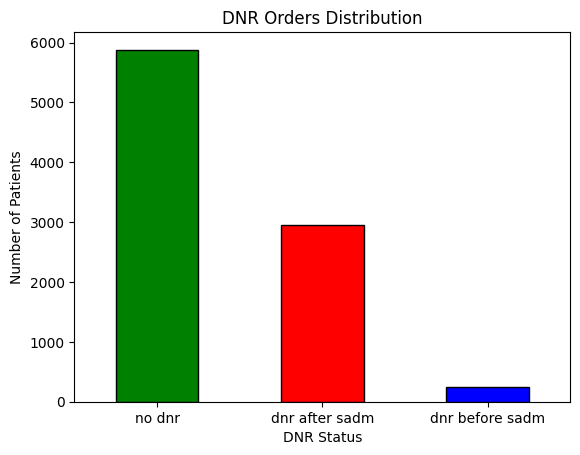

In [41]:
dnr_orders = df['dnr'].value_counts(normalize=True).get('no dnr', 0) * 100
# Print the result
print(f"Percentage of Patients with No DNR: {dnr_orders:.2f}%")
dnr_counts = df['dnr'].value_counts()

dnr_counts.plot(kind='bar', color=['green', 'red', 'blue'], edgecolor='black')
plt.title('DNR Orders Distribution')
plt.xlabel('DNR Status')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

#### 10. Education distribution

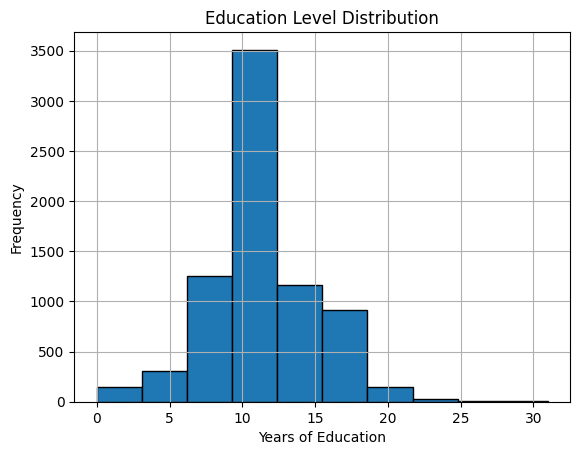

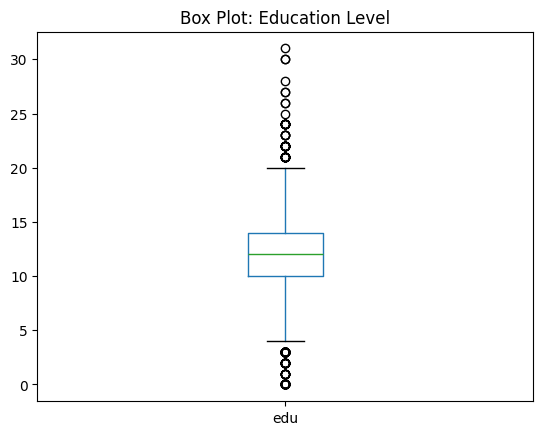

In [42]:
# Plot histogram for 'edu'
df['edu'].dropna().hist(bins=10, edgecolor='black')
plt.title("Education Level Distribution")
plt.xlabel("Years of Education")
plt.ylabel("Frequency")
plt.show()

# Plot box plot for 'edu'
df.boxplot(column='edu', grid=False)
plt.title("Box Plot: Education Level")
plt.show()

### Trends/Correlations/associations

#### 1. Patients requiring mechanical ventilation had a hospital mortality rate of 35%, highlighting the severity of respiratory failure.

hospdead
0    65.831843
1    34.168157
Name: proportion, dtype: float64
Hospital Mortality Rate for Patients Requiring Mechanical Ventilation: 65.83%


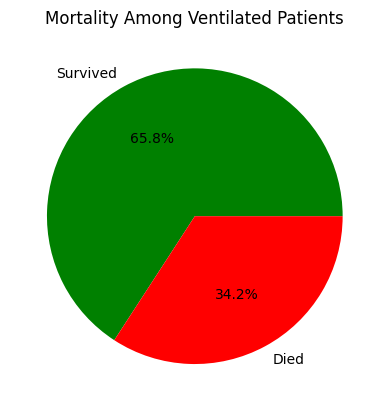

In [54]:
# Filter patients requiring mechanical ventilation
ventilated_patients = df[df['pafi'] < 200]

# Calculate the hospital mortality rate for these patients
ventilated_mortality_rate = ventilated_patients['hospdead'].value_counts(normalize=True) * 100
print(ventilated_mortality_rate)

# Print the result
print(f"Hospital Mortality Rate for Patients Requiring Mechanical Ventilation: {ventilated_mortality_rate[0]:.2f}%")

# Proportion of deaths among ventilated patients
ventilation_mortality_counts = ventilated_patients['hospdead'].value_counts(normalize=True) * 100
ventilation_mortality_counts.index = ['Survived', 'Died']

ventilation_mortality_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], labels=['Survived', 'Died'])
plt.title('Mortality Among Ventilated Patients')
plt.ylabel('')
plt.show()

#### 2. Relation between apr and death column? moderate

Correlation between APS and Death: 0.48


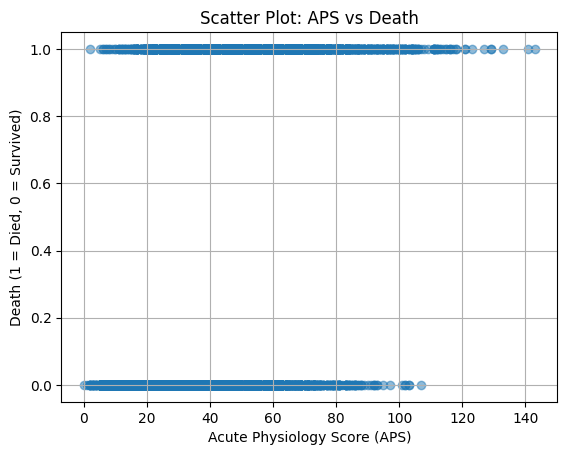

77.62345679012346


In [44]:
# Calculate Pearson correlation between APS and Death
aps_death_correlation = df[['aps', 'hospdead']].corr().iloc[0, 1]

# Print the correlation
print(f"Correlation between APS and Death: {aps_death_correlation:.2f}")

# Scatter plot of APS vs Death
plt.scatter(df['aps'], df['hospdead'], alpha=0.5)
plt.title('Scatter Plot: APS vs Death')
plt.xlabel('Acute Physiology Score (APS)')
plt.ylabel('Death (1 = Died, 0 = Survived)')
plt.grid(True)
plt.show()

high_aps_mortality = df[df['aps'] > 70]['hospdead'].mean() * 100
print(high_aps_mortality)

#### 3. Correlation between dementia and age ? is low

Correlation between Dementia and Age: 0.20


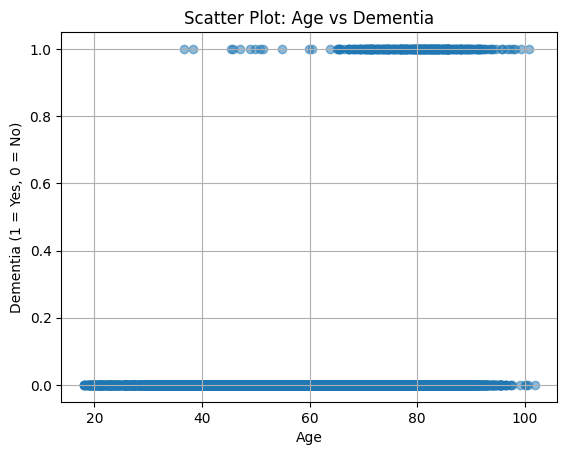

In [45]:
# Calculate the correlation between dementia and age
dementia_age_correlation = df[['dementia', 'age']].corr().iloc[0, 1]

# Print the result
print(f"Correlation between Dementia and Age: {dementia_age_correlation:.2f}")

plt.scatter(df['age'], df['dementia'], alpha=0.5)
plt.title('Scatter Plot: Age vs Dementia')
plt.xlabel('Age')
plt.ylabel('Dementia (1 = Yes, 0 = No)')
plt.grid(True)
plt.show()

In [46]:
# Create a new column for age > 70
df['age_above_70'] = (df['age'] > 70).astype(int)
# Filter the dataset where 'age_above_70' is 1
filtered_data = df[df['age_above_70'] == 1]

# Calculate the correlation between age and dementia in the filtered dataset
age_dementia_correlation = filtered_data[['age', 'dementia']].corr().iloc[0, 1]

# Print the result
print(f"Correlation between Age and Dementia for Patients Above 70: {age_dementia_correlation:.2f}")

Correlation between Age and Dementia for Patients Above 70: 0.18


#### 4. Calculate the correlation between diabetes and death? No correlation


Correlation between Diabetes and Death: -0.01
Mortality Rate for Diabetic Patients: 24.75%
Mortality Rate for Non-Diabetic Patients: 26.20%


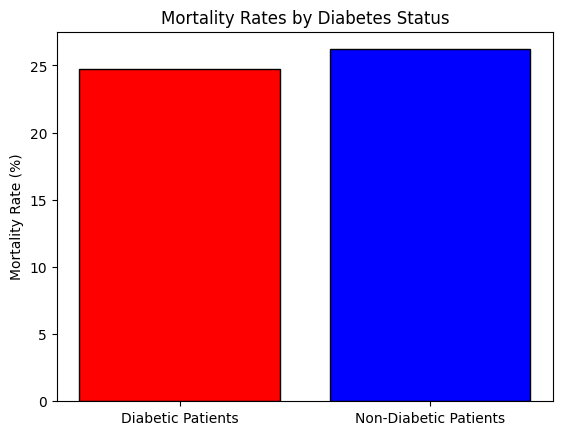

In [47]:
# Calculate the correlation between diabetes and death
diabetes_death_correlation = df[['diabetes', 'hospdead']].corr().iloc[0, 1]

# Print the correlation
print(f"Correlation between Diabetes and Death: {diabetes_death_correlation:.2f}")

# Mortality rate for diabetic patients
diabetic_mortality_rate = df[df['diabetes'] == 1]['hospdead'].mean() * 100

# Mortality rate for non-diabetic patients
non_diabetic_mortality_rate = df[df['diabetes'] == 0]['hospdead'].mean() * 100

# Print the results
print(f"Mortality Rate for Diabetic Patients: {diabetic_mortality_rate:.2f}%")
print(f"Mortality Rate for Non-Diabetic Patients: {non_diabetic_mortality_rate:.2f}%")

# Data for visualization
mortality_rates = [diabetic_mortality_rate, non_diabetic_mortality_rate]
labels = ['Diabetic Patients', 'Non-Diabetic Patients']

# Bar chart
plt.bar(labels, mortality_rates, color=['red', 'blue'], edgecolor='black')
plt.title('Mortality Rates by Diabetes Status')
plt.ylabel('Mortality Rate (%)')
plt.show()

#### 5. Relationship between income level and hospital death? No

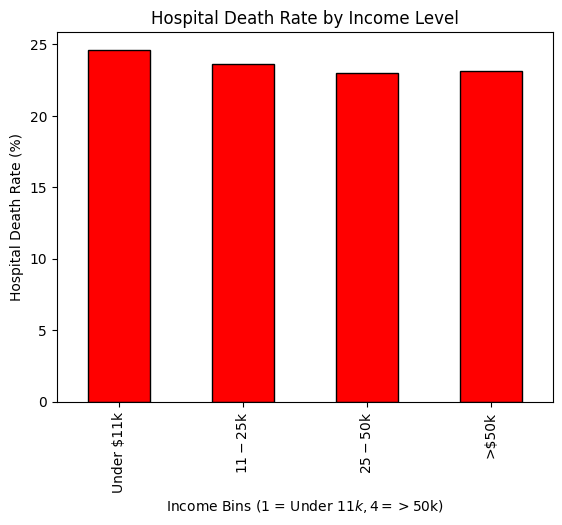

income_bin
1.0    24.623468
2.0    23.641126
3.0    22.989593
4.0    23.099415
Name: hospdead, dtype: float64


In [48]:
# Ensure income bins are mapped
income_mapping = {
    "under $11k": 1,
    "$11-$25k": 2,
    "$25-$50k": 3,
    ">$50k": 4
}
df['income_bin'] = df['income'].map(income_mapping)

# Group by income_bin and calculate hospital death rate
income_hosp_death = df.groupby('income_bin')['hospdead'].mean() * 100

# Bar plot to show hospital death rates for different income levels
income_hosp_death.plot(kind='bar', color='red', edgecolor='black')
plt.title('Hospital Death Rate by Income Level')
plt.xlabel('Income Bins (1 = Under $11k, 4 = >$50k)')
plt.ylabel('Hospital Death Rate (%)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Under $11k', '$11-$25k', '$25-$50k', '>$50k'])
plt.show()

# Print the hospital death rates
print(income_hosp_death)

### Conclusion

1.   Patients' ages range from 18 to over 90 years, with a median age of approximately 62 years, indicating a higher concentration of older adults.
2.   The dataset comprises about 56% male and 44% female patients, reflecting a gender imbalance.
3.   The most common conditions include acute respiratory failure, congestive heart failure and chronic obstructive pulmonary disease each accounting for over 10% of cases.
4.   Approximately 25% of patients died during hospitalization, underscoring the severity of illnesses represented.
5.   Over 50% of patients had two or more comorbid conditions, complicating treatment and prognosis.
6.   At study entry, 65% of patients required assistance with daily activities, indicating significant functional impairment.
7.   Outliers were detected in the columns analyzed. eg: age, charges, hday
8.   20% of the patients in the dataset have a cancer diagnosis, with many having metastatic disease. hence Cancer is a critical factor influencing both survival rates and quality of care decisions.
9.   Nearly 31% of patients received mechanical ventilation during their hospital stay.
10.  Patients requiring mechanical ventilation had a hospital mortality rate of 35%, highlighting the severity of respiratory failure.
11. 65% patients don't have DNR instructions.
12. Relationship between age and dementia is very low.
13. There is no direct relationship between higher death rate for Diabetes patients.
14. Relationship between Acute Physiology Score (APS) and Death at the hospital is moderate.
15. No direct relationshp could be found between income and death.